In [ ]:
# pip install reportlab
# pip install tdt
# pip install opencv-python

### 1. FP data preprocessing

In [1]:
import os   # import os module
import FPFunctions # import User-defined function
import FileFunctions # import User-defined function
import ReportGeneration # import User-defined function
import VideoFunctions # import User-defined function

In [2]:
Raw_data_path =  r'D:\DataAtCSBD\FiberPhotometry\TDT_Tank' #The folder where the TDT tanks are saved
Recorded_date = '240516' #The date of the recording
# Data_folder_path = 'G06_005-250114-150521' #The original folder name generated by TDT Synapse

Base_folder = r'D:\DataAtCSBD\FiberPhotometry\ProcessedData' #The folder where the processed data will be saved
Batch_folder = '240516_PV' 
# Animal_ID = 'B6_M_G06_005'
# Session = 'HA'

In [3]:
Datafolder_list = ['PV-Cre-240516-151509', 'PV-Cre-240516-153244']
Animal_ID_list = ['PV_F_G02_004', 'PV_F_G02_005']
print(Animal_ID_list)
session_list = ['EE']

['PV_F_G02_004', 'PV_F_G02_005']


Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\240516_PV\PV_F_G02_004\EE\Preprocessing already exists.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\240516_PV\PV_F_G02_004\EE\Preprocessing.
read from t=0s to t=677.82s
Data loaded successfully:D:\DataAtCSBD\FiberPhotometry\TDT_Tank\240516\PV-Cre-240516-151509


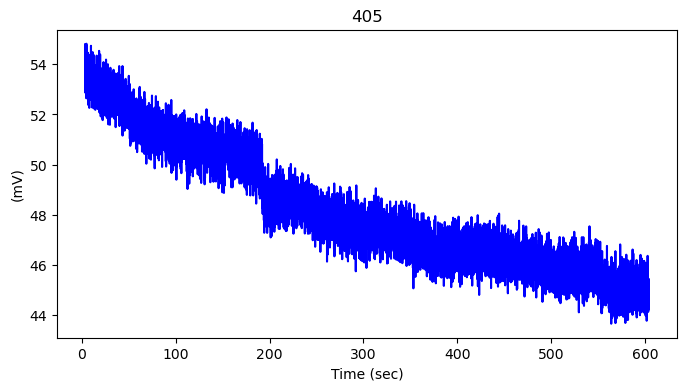

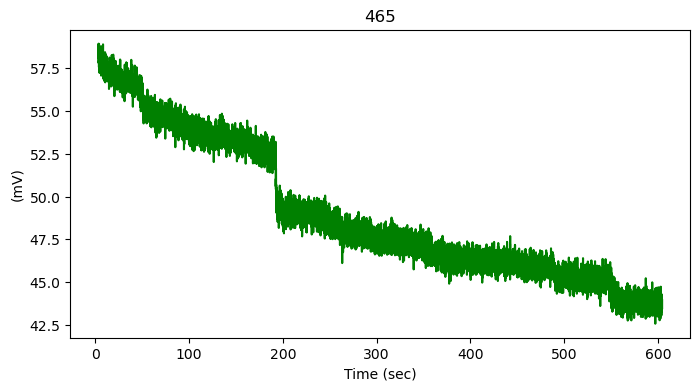

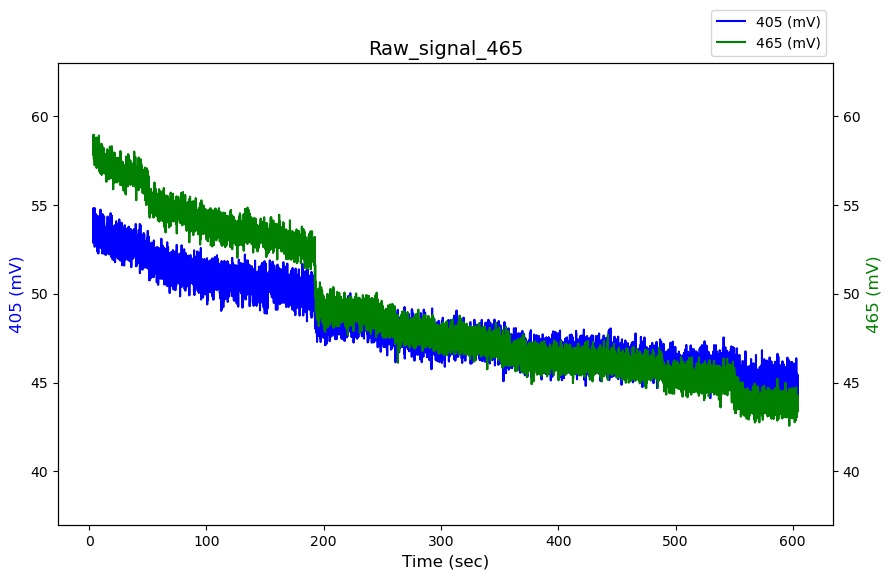

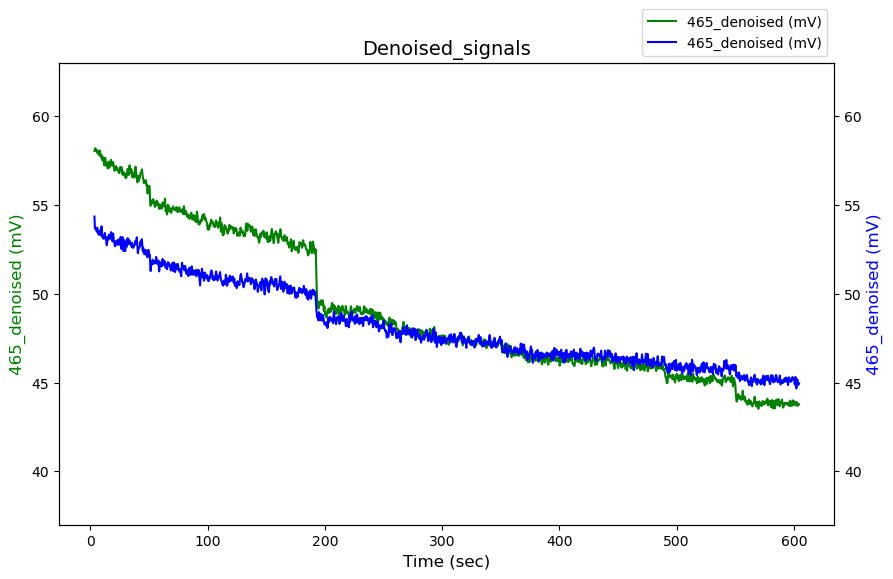

Slope    : 1.701
R-squared: 0.696


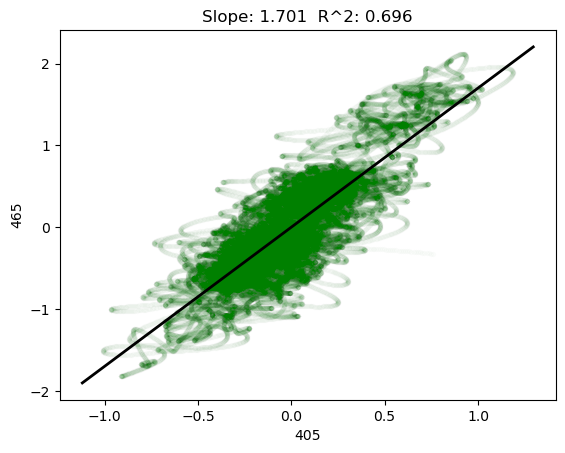

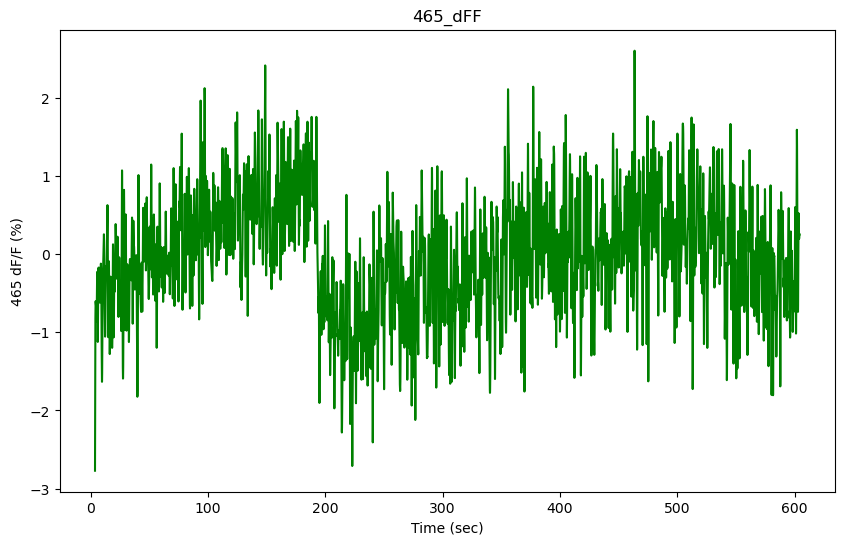

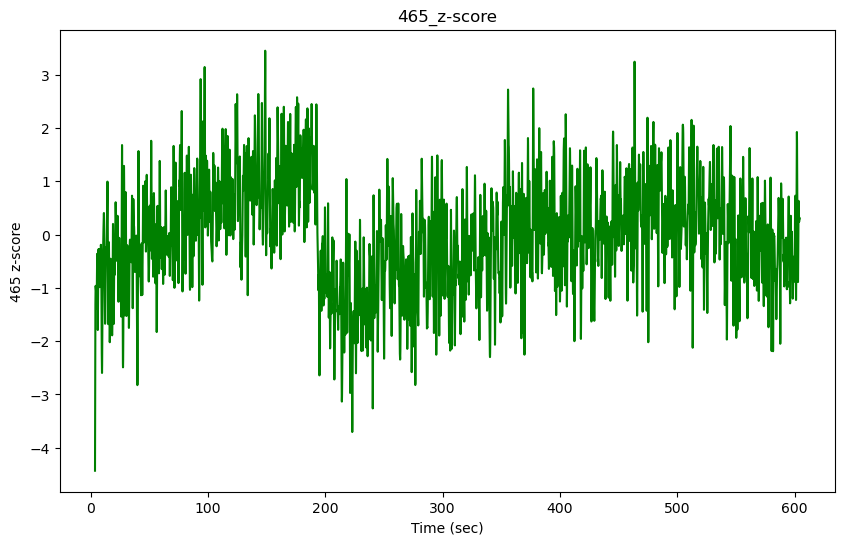

Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\240516_PV\PV_F_G02_005\EE\Preprocessing already exists.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\240516_PV\PV_F_G02_005\EE\Preprocessing.
read from t=0s to t=670.18s
Data loaded successfully:D:\DataAtCSBD\FiberPhotometry\TDT_Tank\240516\PV-Cre-240516-153244


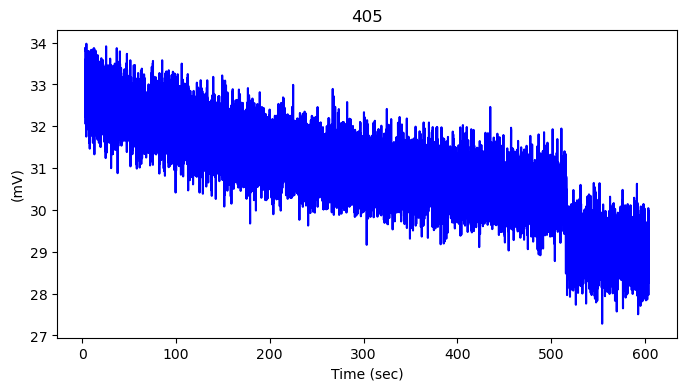

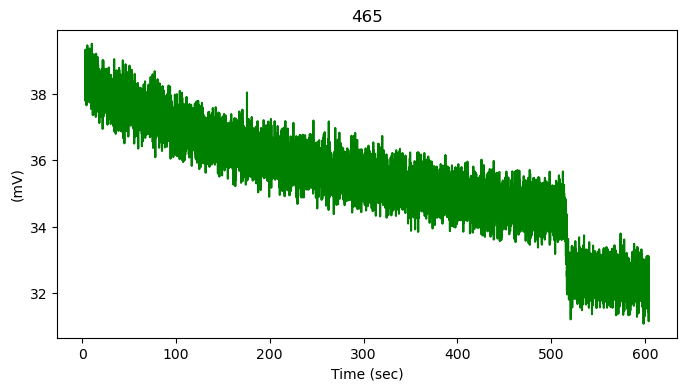

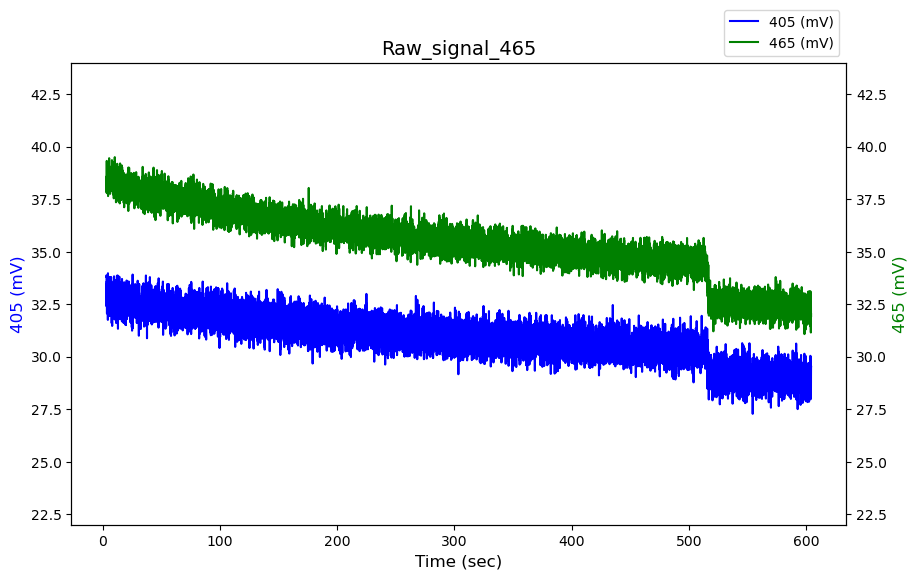

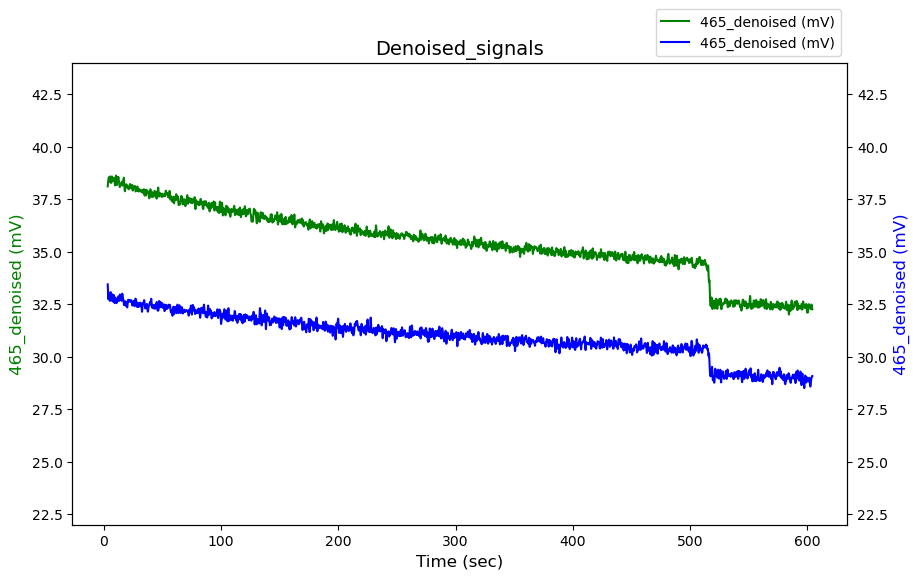

Slope    : 1.200
R-squared: 0.696


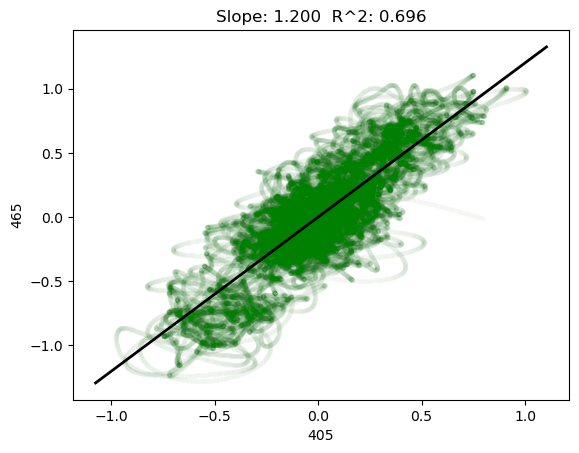

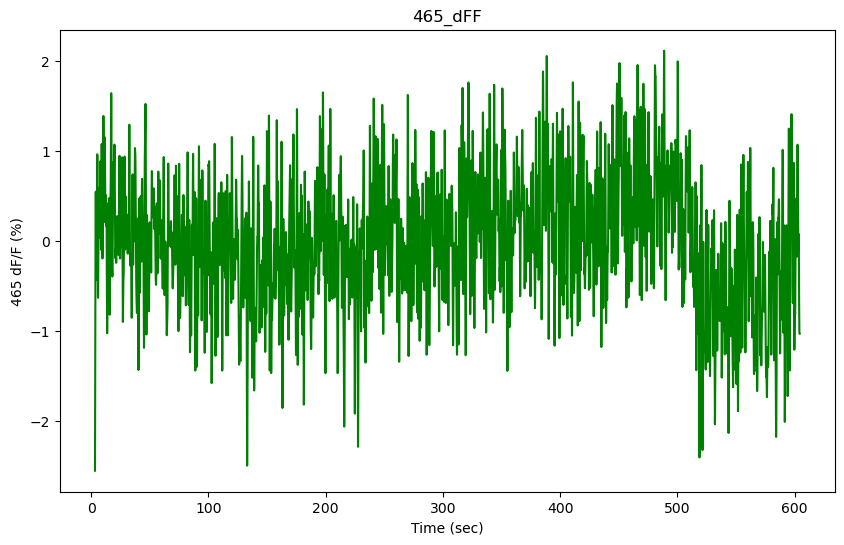

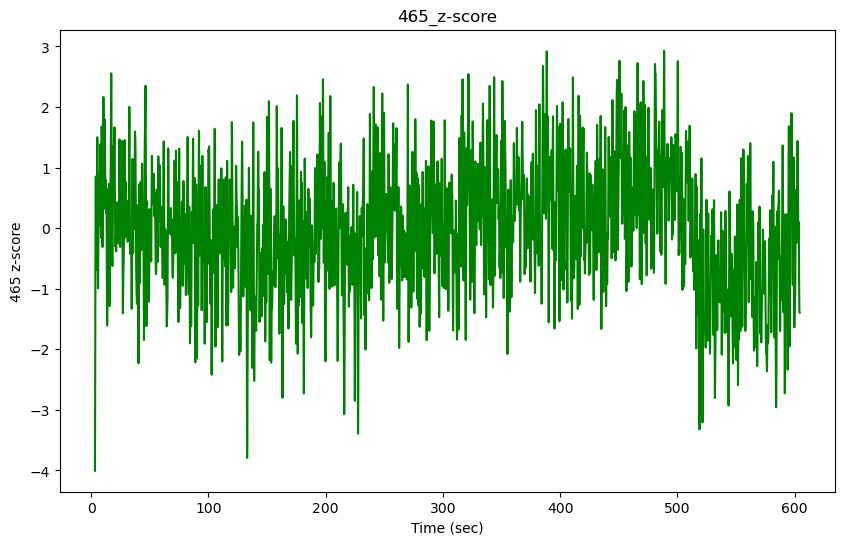

In [5]:
for i, folder in enumerate(Datafolder_list):
                TDT_Tanks_path = os.path.join(Raw_data_path, Recorded_date, folder)
                FPFunctions.FP_preprocessing_1ch(Tank_path=TDT_Tanks_path, 
                                Dest_folder = os.path.join(Base_folder, Batch_folder, Animal_ID_list[i], session_list[0],'Preprocessing'), 
                                FPS=32, 
                                Rec_duration=600)
                
                image_paths = [os.path.join(Base_folder, Batch_folder, Animal_ID_list[i], session_list[0], 'Preprocessing', 'Plot_Raw_signal_465.png'),
                                os.path.join(Base_folder, Batch_folder, Animal_ID_list[i], session_list[0], 'Preprocessing', 'Plot_Denoised_signals.png'), 
                                os.path.join(Base_folder, Batch_folder, Animal_ID_list[i], session_list[0], 'Preprocessing', 'Plot_405_465_correlation.png'), 
                                os.path.join(Base_folder, Batch_folder, Animal_ID_list[i], session_list[0], 'Preprocessing', 'Plot_465_dFF.png')]

                comments = ["Figure1. Raw signals",
                            "Figure2. Denoised signals",
                            "Figure3. Correlation between 405 and 465",
                            "Figure4. 465 dFF"]

                ReportGeneration.FP_preprocessing(output_path=os.path.join(Base_folder, Batch_folder, Animal_ID_list[i], session_list[0]), 
                                                title=f'{Animal_ID_list[i]}_{session_list[0]}', 
                                                image_paths=image_paths, 
                                                comments=comments)

### 2. Peak Analysis for FP signals

In [6]:
import os   # import os module
import FPFunctions # import User-defined function
import FileFunctions # import User-defined function

In [7]:
root_folder = r"D:\DataAtCSBD\FiberPhotometry\ProcessedData\240516_PV"
sub_folder_list = FileFunctions.Grab_folder_names_in_folder(root_folder)
sub_folder_list1 = ['EE'] #The list of session names
print(sub_folder_list)

['PV_F_G02_004', 'PV_F_G02_005']


In [8]:
for sub_folder in sub_folder_list:
    for sub_folder1 in sub_folder_list1:
        destfolder = os.path.join(root_folder, sub_folder, sub_folder1)
        FileFunctions.Set_WD(destfolder)
        FPFunctions.Peak_Analysis(pkl_path=os.path.join(destfolder, 'Preprocessing', 'Final_table_raw_trace.pkl'), 
                                prominence_thres= 2, 
                                amplitude_thres= 4,
                                FPS= 32, 
                                pre_window_len= 3, 
                                post_window_len= 3, 
                                SavePlots = False, 
                                SaveData = False, 
                                SaveVideos= True,
                                video_path=os.path.join(destfolder, f'{sub_folder}_{sub_folder1}.avi'))
        # VideoFunctions.Generate_montage(input_folder=os.path.join(destfolder, 'Peak_Analysis', 'spike_detection'),
        #                                 output_filename='Motatge_spikes.mp4',
        #                                 rows=3,
        #                                 cols=5,
        #                                 frame_rate=25,
        #                                 duration=6,
        #                                 codec='mp4v',
        #                                 popups=[('Firing', 3 , 2)],
        #                                 scale_factor = 0.5) 

Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\240516_PV\PV_F_G02_004\EE already exists.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\240516_PV\PV_F_G02_004\EE.
61 possible peaks detected in the signal
No peaks detected with amplitude threshold
Directory D:\DataAtCSBD\FiberPhotometry\ProcessedData\240516_PV\PV_F_G02_005\EE already exists.
The working directory is set to D:\DataAtCSBD\FiberPhotometry\ProcessedData\240516_PV\PV_F_G02_005\EE.
71 possible peaks detected in the signal
No peaks detected with amplitude threshold


### 3. Epoch Analysis

In [ ]:
import FileFunctions
import FPFunctions
import os

root_folder = r"D:\DataAtCSBD\FiberPhotometry\ProcessedData"
Batch_folder = '241211_B6'
Animal_ID = 'B6_M_G06_001'
Session = 'SE'

FileFunctions.Set_WD(os.path.join(root_folder, Batch_folder, Animal_ID, Session))

FPFunctions.Epoch_Analysis_3EVT(pkl_path=os.path.join(root_folder, Batch_folder, Animal_ID, Session, 'Preprocessing', 'Final_table_raw_trace.pkl'),
                        evt_path='Data_DLC_30.csv',
                        FPS=25,
                        Rec_duration=594,
                        SavePlots=False,
                        SaveData=False,
                        PRE_TIME=2,
                        POST_TIME=5)

In [ ]:
root_folder = r"D:\DataAtCSBD\FiberPhotometry\ProcessedData"
Batch_folder = '241211_B6'
Animal_ID = 'B6_M_G07_005'
Session = 'EE'

FileFunctions.Set_WD(os.path.join(root_folder, Batch_folder, Animal_ID, Session))

FPFunctions.Epoch_Analysis_2EVT(pkl_path=os.path.join(root_folder, Batch_folder, Animal_ID, Session, 'Preprocessing', 'Final_table_raw_trace.pkl'),
                        evt_path='Data_DLC.csv',
                        FPS=25,
                        Rec_duration=600,
                        SavePlots=True,
                        SaveData=True,
                        PRE_TIME=2,
                        POST_TIME=5)